<a href="https://colab.research.google.com/github/sri-harini1/CODSOFT/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




In [2]:
sales_data = pd.read_csv('/content/advertising.csv')


In [3]:
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


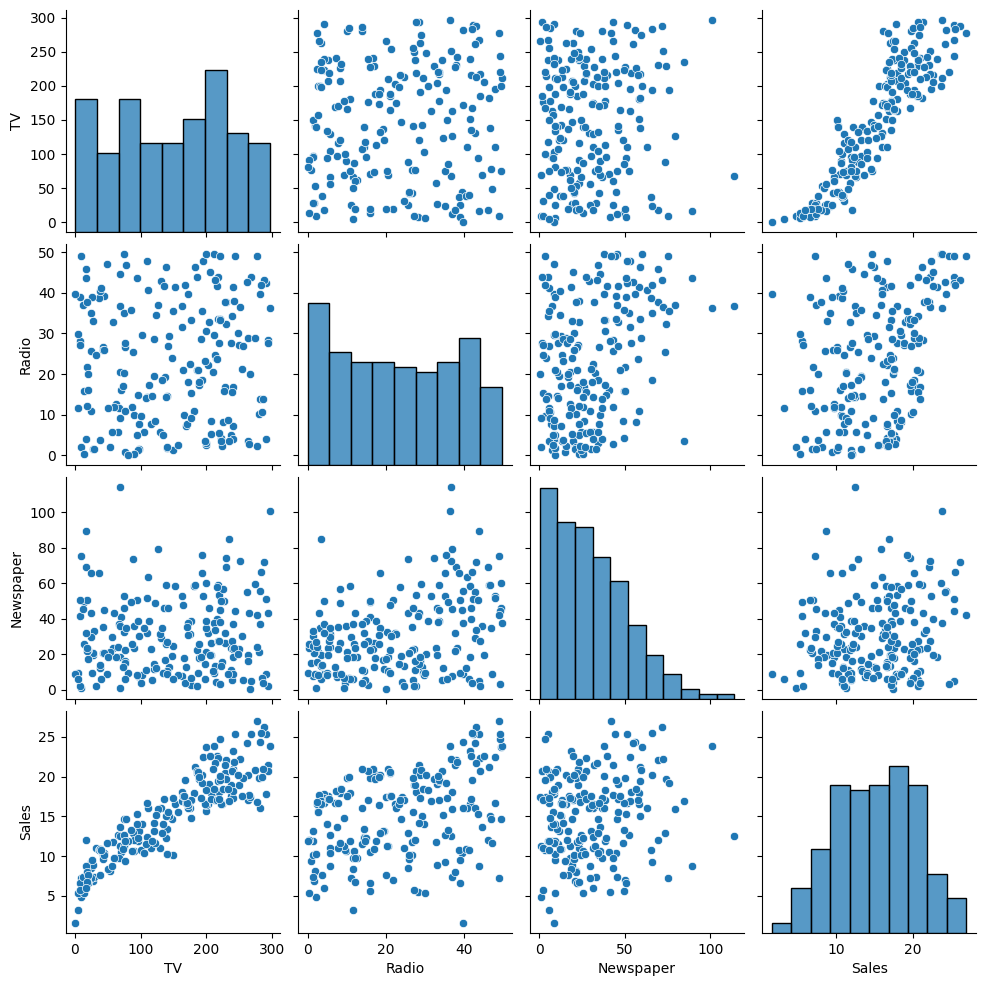

In [4]:
sns.pairplot(sales_data)
plt.show()

In [5]:
#check for missing data
sales_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

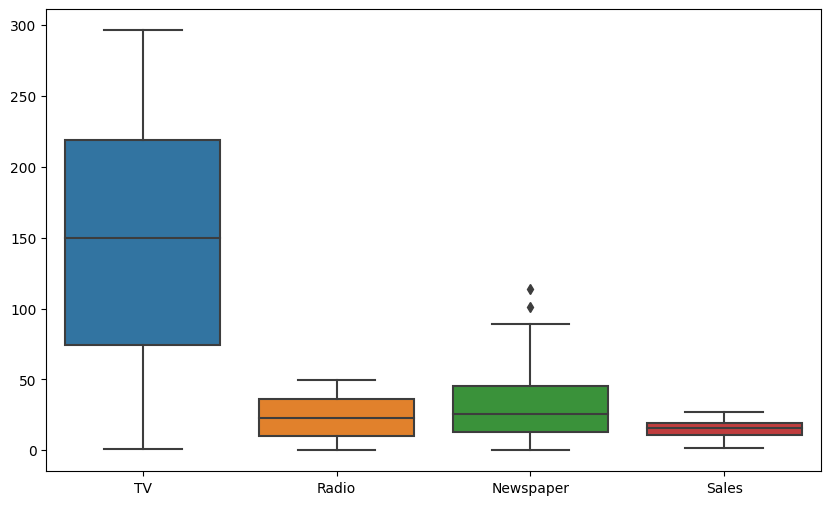

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=sales_data)
plt.show()

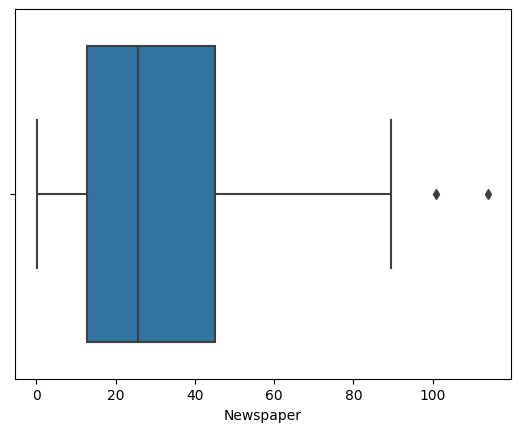

In [8]:
sns.boxplot(x=sales_data["Newspaper"])
plt.show()


In [9]:
Q1 = sales_data["Newspaper"].quantile(0.25)
Q3 = sales_data["Newspaper"].quantile(0.75)
IQR = Q3 - Q1
data_no_outliers = sales_data[~((sales_data["Newspaper"] < Q1 - 1.5 * IQR) | (sales_data["Newspaper"] > Q3 + 1.5 * IQR))]


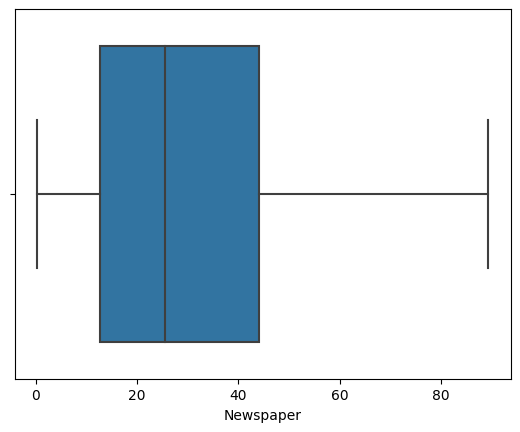

In [10]:
sns.boxplot(x=data_no_outliers["Newspaper"])
plt.show()


In [15]:
X = data_no_outliers.drop("Sales", axis=1)
y = data_no_outliers["Sales"]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

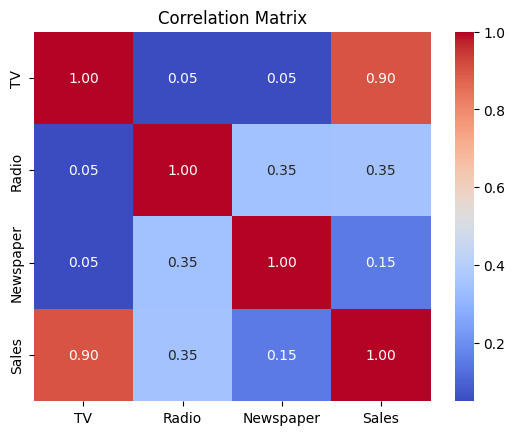

In [18]:
correlation_matrix = data_no_outliers.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


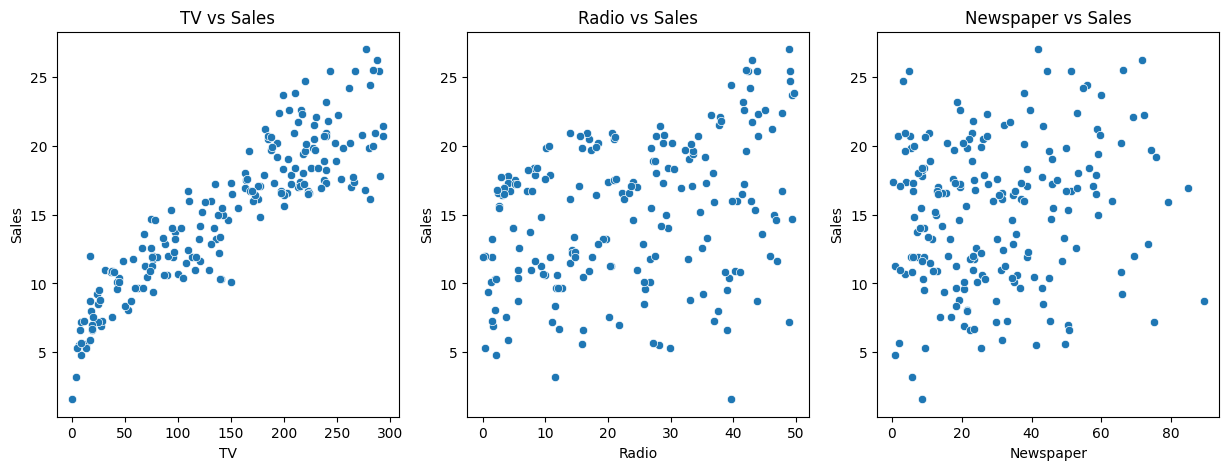

In [21]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=data_no_outliers['TV'], y=data_no_outliers['Sales'])
plt.title("TV vs Sales")

plt.subplot(1, 3, 2)
sns.scatterplot(x=data_no_outliers['Radio'], y=data_no_outliers['Sales'])
plt.title("Radio vs Sales")

plt.subplot(1, 3, 3)
sns.scatterplot(x=data_no_outliers['Newspaper'], y=data_no_outliers['Sales'])
plt.title("Newspaper vs Sales")

plt.show()

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train, y_train)


LinearRegression()

In [27]:
y_pred = model.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [29]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


Mean Squared Error: 2.415728945593508
R-squared Score: 0.9130003152798273


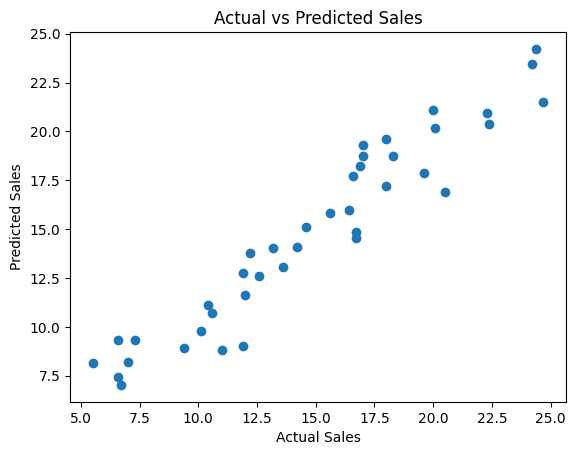

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()